In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

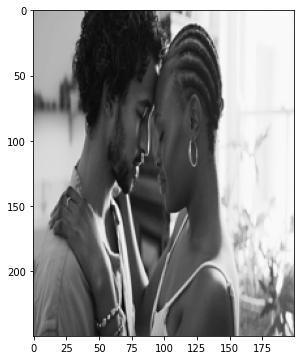

In [93]:
img= Image.open('/content/istockphoto-1366635412-170667a.jpg') 
img = img.convert('L')
img = img.resize((200,250))
plt.figure(figsize=(6,6))
plt.imshow(img , cmap = 'gray')

In [94]:
def thresholds(t, image):
  im2 = image.copy()
  intensity_array = []
  for w in range(0,im2.size[1]):
    for h in range(0,im2.size[0]):
      intensity = im2.getpixel((h,w))
      if (intensity <= t):
        x = intensity
      else:
        x = 0
      intensity_array.append(x)
  im2.putdata(intensity_array)
  plt.figure(figsize=(6,6))
  plt.xticks([]), plt.yticks([])
  plt.imshow(im2 , cmap = 'gray')  

In [95]:
def histogramify(image):
  grayscale_array = []
  for w in range(0,image.size[0]):
    for h in range(0,image.size[1]):
      intensity = image.getpixel((w,h))
      grayscale_array.append(intensity)

  total_pixels = image.size[0] * image.size[1]
  bins = range(0,257)
  img_histogram = np.histogram(grayscale_array, bins)
  return img_histogram

def total_pix(img):
  size = img.size[0] * img.size[1]
  return size

In [96]:
def otsu(image):
  hist = histogramify(image)
  total = total_pix(image)
  current_max, threshold = 0, 0
  sumT, sumF, sumB = 0, 0, 0
  for i in range(0,256):
    sumT += i * hist[0][i]
  weightB, weightF = 0, 0
  varBetween, meanB, meanF = 0, 0, 0
  for i in range(0,256):
    weightB += hist[0][i]
    weightF = total - weightB
    if weightF == 0:
      break
    sumB += i*hist[0][i]
    sumF = sumT - sumB
    meanB = sumB/weightB
    meanF = sumF/weightF
    varBetween = weightB * weightF
    varBetween *= (meanB-meanF)*(meanB-meanF)
    if varBetween > current_max:
      current_max = varBetween
      threshold = i 
  print("threshold is:", threshold)
  thresholds(threshold, image) 
  return threshold

threshold is: 131


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


131

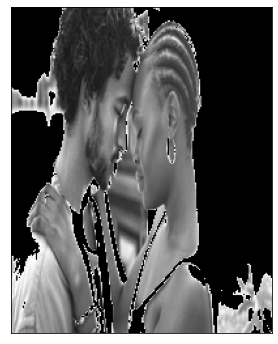

In [97]:
otsu(img)